## 𝑻𝑯𝑬 𝑺𝑷𝑨𝑹𝑲𝑺 𝑭𝑶𝑼𝑵𝑫𝑨𝑻𝑰𝑶𝑵
#### **Author: Riyaz Mehendi Khorasi**

### Task 1- Prediction using Supervised Machine Learning 

#### Predicting the percentage of marks of student based on number of hours they studied

In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Supervised Machine learning: Supervised learning algorithms try to model relationships and dependencies between the target prediction output and the input features such that we can predict the output values for new data based on those relationships which it learned from the previous data sets. In simple we can say that Supervised learning deals with or learns with “labeled” data. 

    Supervised learning classified into two categories of algorithms: 
     Classification: A classification problem is when the output variable is a category.
     Regression: A regression problem is when the output variable is a numeric.


## Importing the required Libraries and Reading the Data CSV files 

In [16]:
# Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Reading data from remote link
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Checking Statistical description 
data.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
# Displaying all the coloumns and their Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking if there exists any null value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

We observed that the dataset has no null values, we can now visualize the data

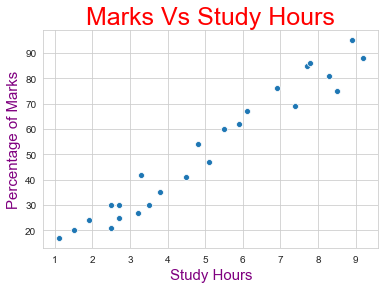

In [6]:
sns.set_style('whitegrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=25,color="Red")
plt.ylabel('Percentage of Marks', size=15,color="Purple")
plt.xlabel('Study Hours', size=15,color="Purple")
plt.show()

Here in above graph it is observed there exists a correlation between "Percentage of Marks" and "Study Hours", to confirm this let's plot a regression line to the above graph!

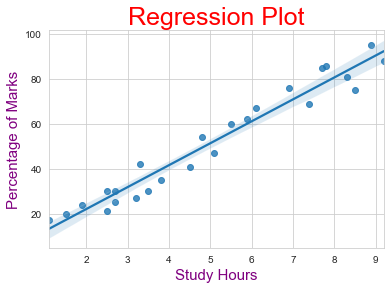

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=25,color="Red")
plt.ylabel('Percentage of Marks', size=15,color="Purple")
plt.xlabel('Study Hours', size=15,color="Purple")
plt.show()
print(data.corr())

Now from the above graph we can say that, the variables are positively correlated!

### Preparing/Splitting the data

In [8]:
# Defining variables X and Y from the Dataset
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

# Now Splitting this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2,random_state = 0)

### Training the Algorithm
We have split our data into training and testing sets, Now we will train our algorithm using Simple Linear Regression



Linear Regression is a machine learning algorithm based on supervised learning. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

In [9]:
LR = LinearRegression()  
LR.fit(train_X, train_Y) 

print("Model Training completed successfully.")

Model Training completed successfully.


### Making Predictions of Percentage of the Marks 

In [12]:
print(test_X) # Testing data - In Hours
y_pred = LR.predict(test_X) # Predicting the scores
Prediction = pd.DataFrame({'Study Hours': [i[0] for i in test_X], 'Predicted Marks': [j for j in y_pred]})
Prediction

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Study Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


𝑪𝒐𝒎𝒑𝒂𝒓𝒊𝒔𝒐𝒏 𝒐𝒇 𝒕𝒉𝒆 𝑷𝒓𝒆𝒅𝒊𝒄𝒕𝒆𝒅 𝑴𝒂𝒓𝒌𝒔 𝒘𝒊𝒕𝒉 𝒕𝒉𝒆 𝑨𝒄𝒕𝒖𝒂𝒍 𝑴𝒂𝒓𝒌𝒔 

In [13]:
scores_comparison = pd.DataFrame({'Actual Marks': test_Y, 'Predicted Marks': y_pred})
scores_comparison

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Though our model is not very precise, the predicted percentages are close to the actual ones

𝑪𝒐𝒎𝒑𝒂𝒓𝒊𝒔𝒐𝒏 𝒐𝒇 𝒕𝒉𝒆 𝑷𝒓𝒆𝒅𝒊𝒄𝒕𝒆𝒅 𝑴𝒂𝒓𝒌𝒔 𝒘𝒊𝒕𝒉 𝒕𝒉𝒆 𝑨𝒄𝒕𝒖𝒂𝒍 𝑴𝒂𝒓𝒌𝒔 𝒖𝒔𝒊𝒏𝒈 𝑫𝒂𝒕𝒂 𝑽𝒊𝒔𝒖𝒂𝒍𝒊𝒛𝒂𝒕𝒊𝒐𝒏

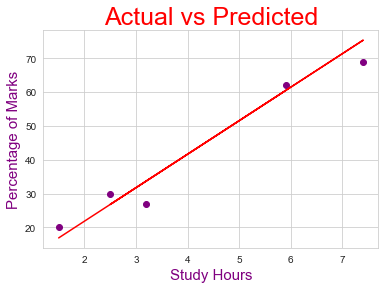

In [14]:
plt.scatter(x=test_X, y=test_Y, color='Purple')
plt.plot(test_X, y_pred, color='Red')
plt.title('Actual vs Predicted', size=25,color="Red")
plt.ylabel('Percentage of Marks', size=15,color="Purple")
plt.xlabel('Study Hours', size=15,color="Purple")
plt.show()

### Model Evaluation 

In [17]:
# Let's Calculate the Performance of the Model
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


 𝑾𝒉𝒂𝒕 𝒘𝒊𝒍𝒍 𝒃𝒆 𝒑𝒓𝒆𝒅𝒊𝒄𝒕𝒆𝒅 𝒔𝒄𝒐𝒓𝒆 𝒊𝒇 𝒂 𝒔𝒕𝒖𝒅𝒆𝒏𝒕 𝒔𝒕𝒖𝒅𝒊𝒆𝒔 𝒇𝒐𝒓 9.25 𝒉𝒓𝒔/ 𝒅𝒂𝒚?

In [20]:
# Calculating score for the student studying 9.25 hrs per day.
hours =[9.25]
Prediction = LR.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(Prediction[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737535


Finally according to the regression model , if a student studies for 9.25 hours per day he/she is likely to score Approx 93.69 marks.